# Loan Prediction iii Data Preparation
link: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

Here, we will do:
- Missing value treatment
- Outlier treatment
- Machine Learning Attempt
- Feature Engineering

## Load Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Load Data

In [2]:
train = pd.read_csv(r"C:\Users\LW130003\Desktop\Data Science\Data Science Projects\New folder\loan prediction iii\train.csv", 
                   index_col="Loan_ID")
test = pd.read_csv(r"C:\Users\LW130003\Desktop\Data Science\Data Science Projects\New folder\loan prediction iii\test.csv", 
                   index_col="Loan_ID")

In [3]:
train.shape, test.shape

((614, 12), (367, 11))

In [4]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
#Combine into data:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(981, 13)

## Check missing value:

In [6]:
data.isnull().sum()
# or data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

## Look at categories of all object variables:

In [7]:
categories = train.describe(include=['O']).columns.tolist()
for category in categories:
    print('\nFrequency count for feature %s'%category)
    print(data[category].value_counts())


Frequency count for feature Gender
Male      775
Female    182
Name: Gender, dtype: int64

Frequency count for feature Married
Yes    631
No     347
Name: Married, dtype: int64

Frequency count for feature Dependents
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

Frequency count for feature Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64

Frequency count for feature Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64

Frequency count for feature Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

Frequency count for feature Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64

Frequency count for feature source
train    614
test     367
Name: source, dtype: int64


## Impute missing value with mean or mode

In [8]:
# Fill the missing value in features with mean/mode/median
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

# Check if there is still any missing column
data.isnull().sum(0)

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64

## Outliers

In this section, we will remove the outliers in the data.

Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, **Outlier is an observation that appears far away and diverges from an overall pattern in a sample**.

Outlier can be of two types: Univariate and Multivariate. Univariate outlier is outlier that can be spotted when we look at distribution of a single variable. SImilarly, Multivariate outlier is outlier that can be spotted when we look at distributions in multi-dimension.

Causes of outliers can be classified in two broad categories:
- Artificial (Error) / Non-natural
- Natural.

Let’s understand various types of outliers in more detail:
- **Data Entry Errors**:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data. For example: Annual income of a customer is \$100,000. Accidentally, the data entry operator puts an additional zero in the figure. Now the income becomes $1,000,000 which is 10 times higher. Evidently, this will be the outlier value when compared with rest of the population.
- **Measurement Error**: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty. For example: There are 10 weighing machines. 9 of them are correct, 1 is faulty. Weight measured by people on the faulty machine will be higher / lower than the rest of people in the group. The weights measured on faulty machine can lead to outliers.
- **Experimental Error**: Another cause of outliers is experimental error. For example: In a 100m sprint of 7 runners, one runner missed out on concentrating on the ‘Go’ call which caused him to start late. Hence, this caused the runner’s run time to be more than other runners. His total run time can be an outlier.
- **Intentional Outlier**: This is commonly found in self-reported measures that involves sensitive data. For example: Teens would typically under report the amount of alcohol that they consume. Only a fraction of them would report actual value. Here actual values might look like outliers because rest of the teens are under reporting the consumption.
- **Data Processing Error**: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
- **Sampling error**: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
- **Natural Outlier**: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.
 
**What is the impact of Outliers on a dataset?**

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:
- It increases the error variance and reduces the power of statistical tests
- If the outliers are non-randomly distributed, they can decrease normality
- They can bias or influence estimates that may be of substantive interest
- They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

**How to detect Outliers?**

Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot (above, we have used box plot and scatter plot for visualization). Some analysts also various thumb rules to detect outliers. Some of them are:

- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
- Data points, three or more standard deviation away from mean are considered outlier
- Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding
- Bivariate and multivariate outliers are typically measured using either an index of influence or leverage, or distance. Popular indices such as Mahalanobis’ distance and Cook’s D are frequently used to detect outliers.
- In SAS, we can use PROC Univariate, PROC SGPLOT. To identify outliers and influential observation, we also look at statistical measure like STUDENT, COOKD, RSTUDENT and others.

**How to remove Outliers?**

Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

- **Deleting observations**: We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers.

- **Transforming and binning values**: Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values. Binning is also a form of variable transformation. Decision Tree algorithm allows to deal with outliers well due to binning of variable. We can also use the process of assigning weights to different observations.

- **Imputing**: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier observation and after that we can impute it with predicted values.

- **Treat separately**: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.

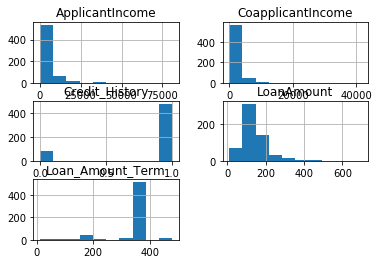

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# Numerical variable histogram of train
train.hist();

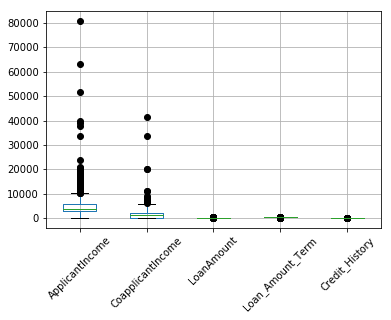

In [10]:
train.boxplot(rot=45,sym='k');

## Transforming Data

We will tranform the LoanAmount and Loan_Amount_Term with log tranformaton creating, LoanAmount_log, Loan_Amount_Term_log.

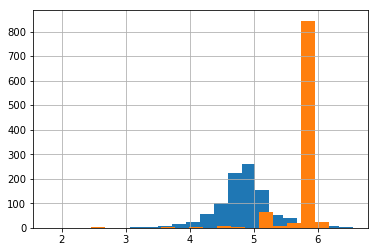

In [11]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['Loan_Amount_Term_log'] = np.log(data['Loan_Amount_Term'])
data['LoanAmount_log'].hist(bins=20)
data['Loan_Amount_Term_log'].hist(bins=20)

## Creating New Features

Next, we will create TotalIncome_log which is the log value of LoanAmount and TotalIncome features

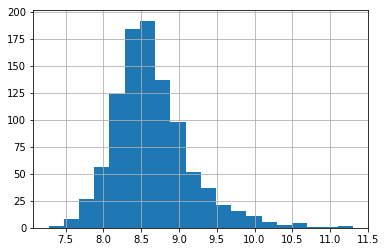

In [12]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_log'] = np.log(data['TotalIncome'])
data['TotalIncome_log'].hist(bins=20)

## Final Data

In [13]:
data.dtypes

ApplicantIncome           int64
CoapplicantIncome       float64
Credit_History          float64
Dependents               object
Education                object
Gender                   object
LoanAmount              float64
Loan_Amount_Term        float64
Loan_Status              object
Married                  object
Property_Area            object
Self_Employed            object
source                   object
LoanAmount_log          float64
Loan_Amount_Term_log    float64
TotalIncome             float64
TotalIncome_log         float64
dtype: object

## Numerical Coding

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Dependents', 'Education', 'Gender', 'Married',
                 'Property_Area', 'Self_Employed']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

## One-Hot Encoding

In [15]:
# Many ML algorithm cannot accept string value, convert categorical data into numerical
# One hot encoder
data2 = data.copy()
data = pd.get_dummies(data, columns=var_to_encode)
"""
# or fit_transform method
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i].values.tolist())
"""
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    data2[i] = le.fit_transform(data2[i].values.tolist())

In [16]:
data.dtypes

ApplicantIncome           int64
CoapplicantIncome       float64
Credit_History          float64
LoanAmount              float64
Loan_Amount_Term        float64
Loan_Status              object
source                   object
LoanAmount_log          float64
Loan_Amount_Term_log    float64
TotalIncome             float64
TotalIncome_log         float64
Dependents_0              uint8
Dependents_1              uint8
Dependents_2              uint8
Dependents_3              uint8
Education_0               uint8
Education_1               uint8
Gender_0                  uint8
Gender_1                  uint8
Married_0                 uint8
Married_1                 uint8
Property_Area_0           uint8
Property_Area_1           uint8
Property_Area_2           uint8
Self_Employed_0           uint8
Self_Employed_1           uint8
dtype: object

In [17]:
data2.dtypes

ApplicantIncome           int64
CoapplicantIncome       float64
Credit_History          float64
Dependents                int64
Education                 int64
Gender                    int64
LoanAmount              float64
Loan_Amount_Term        float64
Loan_Status              object
Married                   int64
Property_Area             int64
Self_Employed             int64
source                   object
LoanAmount_log          float64
Loan_Amount_Term_log    float64
TotalIncome             float64
TotalIncome_log         float64
dtype: object

get_dummy method create new variables, while fit_transform method preserve the features.

## Separate train & test

In [18]:
train = data2.loc[data['source']=='train']
test = data2.loc[data['source']=='test']

# drop source column for train and source and Loan_Status for test
train.drop('source',axis=1,inplace=True)
test.drop(['source','Loan_Status'],axis=1,inplace=True)

C:\Users\LW130003\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\LW130003\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
# Saving
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

## Build simple predictive model for testing

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

C:\Users\LW130003\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train] 
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 16 columns):
ApplicantIncome         614 non-null int64
CoapplicantIncome       614 non-null float64
Credit_History          614 non-null float64
Dependents              614 non-null int64
Education               614 non-null int64
Gender                  614 non-null int64
LoanAmount              614 non-null float64
Loan_Amount_Term        614 non-null float64
Loan_Status             614 non-null object
Married                 614 non-null int64
Property_Area           614 non-null int64
Self_Employed           614 non-null int64
LoanAmount_log          614 non-null float64
Loan_Amount_Term_log    614 non-null float64
TotalIncome             614 non-null float64
TotalIncome_log         614 non-null float64
dtypes: float64(8), int64(7), object(1)
memory usage: 81.5+ KB


In [23]:
# Logistic Regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [24]:
# Logistic Regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [25]:
# Logistic Regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Gender','Married']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 68.730%
Cross-Validation Score : 68.729%


In [26]:
# Logistic Regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['ApplicantIncome', 'CoapplicantIncome', 'Credit_History',
                 'LoanAmount', 'Loan_Amount_Term', 'Dependents', 'Education', 
                 'Gender', 'Married', 'Property_Area', 'Self_Employed',
                 'LoanAmount_log', 'Loan_Amount_Term', 'Loan_Amount_Term_log',
                 'TotalIncome', 'TotalIncome_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 81.270%
Cross-Validation Score : 80.784%


In [27]:
# Decision Tree
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['ApplicantIncome', 'CoapplicantIncome', 'Credit_History',
                 'LoanAmount', 'Loan_Amount_Term', 'Dependents', 'Education', 
                 'Gender', 'Married', 'Property_Area', 'Self_Employed',
                 'LoanAmount_log', 'Loan_Amount_Term', 'Loan_Amount_Term_log',
                 'TotalIncome', 'TotalIncome_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 73.615%


In [28]:
# Random Forest
outcome_var = 'Loan_Status'
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['ApplicantIncome', 'CoapplicantIncome', 'Credit_History',
                 'LoanAmount', 'Loan_Amount_Term', 'Dependents', 'Education', 
                 'Gender', 'Married', 'Property_Area', 'Self_Employed',
                 'LoanAmount_log', 'Loan_Amount_Term', 'Loan_Amount_Term_log',
                 'TotalIncome', 'TotalIncome_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 79.155%


In [29]:
# Random Forest
outcome_var = 'Loan_Status'
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Credit_History', 'TotalIncome', 'ApplicantIncome', 'TotalIncome_log', 
                 'LoanAmount_log', 'LoanAmount']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.339%


In [30]:
# Random Forest
outcome_var = 'Loan_Status'
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Credit_History', 'TotalIncome', 
                 'LoanAmount_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.996%


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 16 columns):
ApplicantIncome         614 non-null int64
CoapplicantIncome       614 non-null float64
Credit_History          614 non-null float64
Dependents              614 non-null int64
Education               614 non-null int64
Gender                  614 non-null int64
LoanAmount              614 non-null float64
Loan_Amount_Term        614 non-null float64
Loan_Status             614 non-null object
Married                 614 non-null int64
Property_Area           614 non-null int64
Self_Employed           614 non-null int64
LoanAmount_log          614 non-null float64
Loan_Amount_Term_log    614 non-null float64
TotalIncome             614 non-null float64
TotalIncome_log         614 non-null float64
dtypes: float64(8), int64(7), object(1)
memory usage: 101.5+ KB


In [32]:
# Decision Tree
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [33]:
# Decision Tree
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Married','Education']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [34]:
# Decision Tree
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%
